# Visualization of Original Data Distribution in the Human Lymph Node Dataset

## Loading Packages

In [ ]:
import warnings
## filter out all warnings
warnings.filterwarnings('ignore')

import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading Data

In [ ]:
# the location of Human_Lymph_Node Dataset
file_fold = '../../../Data/Human_Lymph_Node_A1/'

adata_omics_1_1 = sc.read_h5ad(file_fold + 'adata_RNA.h5ad')
adata_omics_1_2 = sc.read_h5ad(file_fold + 'adata_ADT.h5ad')

## Annotation of A1 scice
Ann_df = pd.read_csv(file_fold + 'annotation.txt', sep='\t', header=None, index_col=0)
Ann_df.columns = ['Ground Truth']
adata_omics_1_1.obs['Ground Truth'] = Ann_df.loc[adata_omics_1_1.obs_names, 'Ground Truth']
adata_omics_1_2.obs['Ground Truth'] = Ann_df.loc[adata_omics_1_2.obs_names, 'Ground Truth']

In [17]:
# Filtering Data
categories = ['medulla cords', 'medulla sinuses', 'cortex', 'pericapsular adipose tissue']

adata_omics_1_1 = adata_omics_1_1[adata_omics_1_1.obs['Ground Truth'].isin(categories)]
adata_omics_1_2 = adata_omics_1_2[adata_omics_1_2.obs['Ground Truth'].isin(categories)]

RNA = adata_omics_1_1.X.toarray()
protein = adata_omics_1_2.X.toarray()
RNA = np.average(RNA, axis=1)
protein = np.average(protein, axis=1)

## Ploting

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


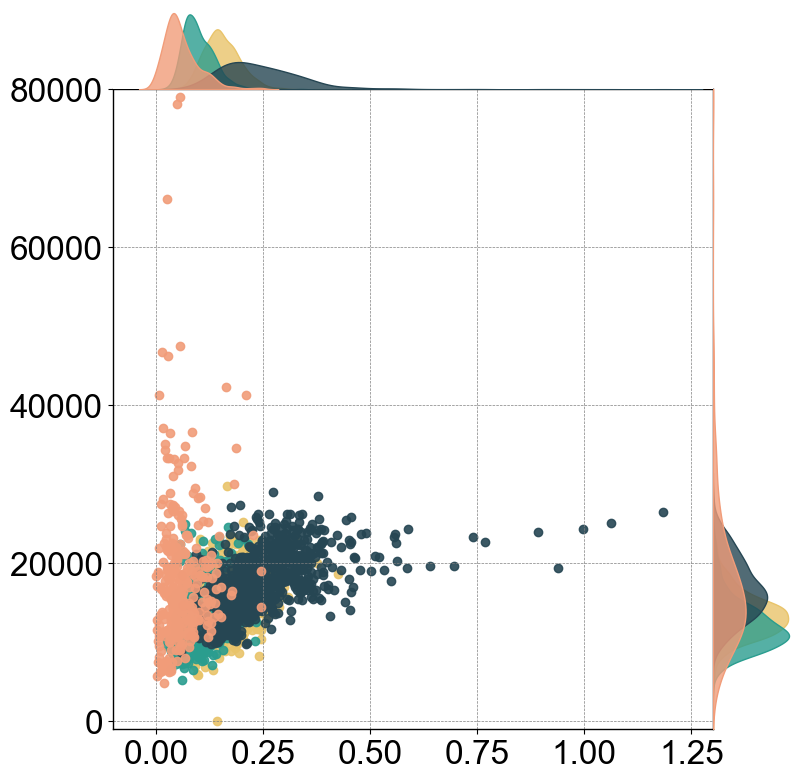

In [39]:
colors = [
    '#e9c46a', '#2a9d8f', '#264653', '#f19c79'
]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.15, 0.1, 0.75, 0.8])   # Scatter plot location
ax1 = fig.add_axes([0.15, 0.9, 0.75, 0.1])  # Marginal distribution map location 1
ax2 = fig.add_axes([0.9, 0.1, 0.1, 0.8])    # Marginal distribution map location 2

# Scatter plot
for i, category in enumerate(categories):
    idx = adata_omics_1_1.obs['Ground Truth'] == category
    ax.scatter(RNA[idx], protein[idx], label=category, alpha=0.9, color=colors[i])
ax.set_xlim([-0.1, 1.3])
ax.set_ylim([-1000, 80000])
ticks = np.arange(0, 80001, 20000)
ax.set_yticks(ticks)
ax.tick_params(axis='both', labelsize=24)

for spine in ax.spines.values():
    spine.set_linewidth(1)
    spine.set_color('black')

ax.grid(True, linestyle='--', color='gray', linewidth=0.5)

# Marginal distribution map - RNA
for i, category in enumerate(categories):
    idx = adata_omics_1_1.obs['Ground Truth'] == category
    sns.kdeplot(RNA[idx], ax=ax1, vertical=False, color=colors[i], bw_adjust=1, fill=colors[i], alpha=0.8)
ax1.set_ylabel('')
ax1.set_xlim([-0.1, 1.3])
ax1.set_xticks([])
ax1.set_yticks([])
for spine in ax1.spines.values():
        spine.set_visible(False)

# Marginal distribution map - Protein
for i, category in enumerate(categories):
    idx = adata_omics_1_1.obs['Ground Truth'] == category
    sns.kdeplot(protein[idx], ax=ax2, color=colors[i], bw_adjust=1, fill=colors[i], alpha=0.8, vertical=True)
ax2.set_xlabel('')
ax2.set_ylim([-0.1, 80000])
ax2.set_xticks([])
ax2.set_yticks([])
for spine in ax2.spines.values():
        spine.set_visible(False)

ax.set_title('')
ax.set_xlabel('', fontsize=28, fontname='Arial')
ax.set_ylabel('', fontsize=28, fontname='Arial')

# save
plt.tight_layout()
plt.savefig('./Original_Data_Distribution.png')
plt.savefig('./Original_Data_Distribution.eps')
plt.show()